#### Ici on ouvre toutes les mesures de températures disponibles

F:/bicwin26/Summary/temperature_profiles\20260209_gps2_waypoint039.csv
F:/bicwin26/Summary/temperature_profiles\20260208_gps2_waypoint034.csv
F:/bicwin26/Summary/temperature_profiles\20260208_gps2_waypoint037.csv
F:/bicwin26/Summary/temperature_profiles\20260210_gps1_waypoint041.csv
F:/bicwin26/Summary/temperature_profiles\20260212_gps2_waypoint087.csv
F:/bicwin26/Summary/temperature_profiles\20260209_gps2_waypoint041.csv
F:/bicwin26/Summary/temperature_profiles\20260205_gps1_waypoint033.csv
F:/bicwin26/Summary/temperature_profiles\20260206_gpsSP_waypoint201.csv
F:/bicwin26/Summary/temperature_profiles\20260206_gpsSP_waypoint202.csv
F:/bicwin26/Summary/temperature_profiles\20260210_gps1_waypoint049.csv
F:/bicwin26/Summary/temperature_profiles\20260209_gps2_waypoint039.csv
F:/bicwin26/Summary/temperature_profiles\20260208_gps2_waypoint034.csv
F:/bicwin26/Summary/temperature_profiles\20260208_gps2_waypoint037.csv
F:/bicwin26/Summary/temperature_profiles\20260210_gps1_waypoint041.csv
F:/b

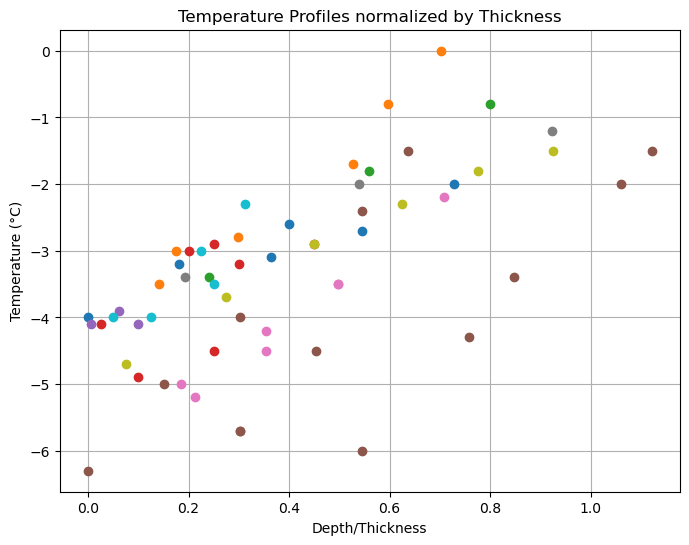

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

temperatures_directory = 'F:/bicwin26/Summary/temperature_profiles'

def convert_to_float(value):
    if type(value) != str:
        return value
    else:
        return float(value.replace(',', '.'))
def convert_to_arrayoffloats(values):
    return np.array([convert_to_float(value) for value in values])

def read_temperature_profile(filename):
    file_path = os.path.join(temperatures_directory, filename)
    print(file_path)
    df = pd.read_csv(file_path, sep=';', encoding='latin-1')

    z_cm = convert_to_arrayoffloats(df['z_cm'].values)
    T_celsius = convert_to_arrayoffloats(df['T_celsius'].values)
    thickness_cm = convert_to_float(df['epaisseur_cm'].values[0])
    return z_cm, T_celsius, thickness_cm
def read_temperature_profiles(directory):
    temperature_profiles = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            z_cm, T_celsius, thickness_cm = read_temperature_profile(filename)
            temperature_profiles[filename] = (z_cm, T_celsius,thickness_cm)
    return temperature_profiles

read_temperature_profiles(temperatures_directory)

def plot_temperature_profiles(temperature_profiles):
    plt.figure(figsize=(8, 6))
    for filename, (z_cm, T_celsius, thickness_cm) in temperature_profiles.items():
        print(type(thickness_cm))
        plt.plot(z_cm/thickness_cm, T_celsius, 'o', label=f'{filename} (thickness: {thickness_cm} cm)')
    #plt.gca().invert_yaxis()
    plt.xlabel('Depth/Thickness')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Profiles normalized by Thickness')
    #plt.legend()
    plt.grid()
    plt.show()
temperature_profiles = read_temperature_profiles(temperatures_directory)
plot_temperature_profiles(temperature_profiles)

In [5]:
read_temperature_profiles(temperatures_directory)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 48: invalid continuation byte